In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [35]:
data = pd.read_csv("E:/DS SM/Apple Stock Price/Dataset/AAPL.csv")

In [36]:
data

,Date,Open,High,Low,Close,Day Difference,Adj Close,Volume
0,12-12-1980,0.128348,0.128906,0.128348,0.128348,0.00000,0.099450,469033600.0
1,15-12-1980,0.122210,0.122210,0.121652,0.121652,-0.00056,0.094261,175884800.0
2,16-12-1980,0.113281,0.113281,0.112723,0.112723,-0.00056,0.087343,105728000.0
3,17-12-1980,0.115513,0.116071,0.115513,0.115513,0.00000,0.089504,86441600.0
4,18-12-1980,0.118862,0.119420,0.118862,0.118862,0.00000,0.092099,73449600.0
...,...,...,...,...,...,...,...,...
10786,26-09-2023,174.820007,175.199997,171.660004,171.960007,-2.86000,171.960007,64588900.0
10787,27-09-2023,172.619995,173.039993,169.050003,170.429993,-2.19000,170.429993,66921800.0
10788,28-09-2023,169.339996,172.029999,167.619995,170.690002,1.35001,170.690002,56294400.0
10789,29-09-2023,172.020004,173.070007,170.339996,171.210007,-0.81000,171.210007,51814200.0


In [37]:
data.shape

(10791, 8)

In [38]:
data.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Day Difference    0
Adj Close         0
Volume            0
dtype: int64

In [39]:
data.info() #date Dtype is object, so we have to convert it into Date time using pandas to_datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10791 entries, 0 to 10790
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10791 non-null  object 
 1   Open            10791 non-null  float64
 2   High            10791 non-null  float64
 3   Low             10791 non-null  float64
 4   Close           10791 non-null  float64
 5   Day Difference  10791 non-null  float64
 6   Adj Close       10791 non-null  float64
 7   Volume          10791 non-null  float64
dtypes: float64(7), object(1)
memory usage: 674.6+ KB


In [40]:
data['Date'] = pd.to_datetime(data['Date'], format = '%d-%m-%Y')

In [41]:
data.info() #Now the date format is corrected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10791 entries, 0 to 10790
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            10791 non-null  datetime64[ns]
 1   Open            10791 non-null  float64       
 2   High            10791 non-null  float64       
 3   Low             10791 non-null  float64       
 4   Close           10791 non-null  float64       
 5   Day Difference  10791 non-null  float64       
 6   Adj Close       10791 non-null  float64       
 7   Volume          10791 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 674.6 KB


In [42]:
print(f"DataFrame contain stock price betweeen {data.Date.min()} {data.Date.max()}")
print(f"Total Number of days is = {(data.Date.max() - data.Date.min()).days}")

DataFrame contain stock price betweeen 1980-12-12 00:00:00 2023-10-02 00:00:00
Total Number of days is = 15634


In [43]:
data.describe()

,Open,High,Low,Close,Day Difference,Adj Close,Volume
count,10791.000000,10791.000000,10791.000000,10791.000000,10791.000000,10791.000000,1.079100e+04
mean,19.113833,19.326299,18.908083,19.124988,0.011155,18.394861,3.230263e+08
std,40.156308,40.614073,39.724960,40.186661,0.674173,39.808498,3.367116e+08
min,0.049665,0.049665,0.049107,0.049107,-7.080000,0.038050,0.000000e+00
25%,0.292411,0.300469,0.285536,0.292411,-0.010050,0.240748,1.175944e+08
50%,0.504464,0.513393,0.495536,0.504464,0.000000,0.414394,2.107616e+08
75%,18.555357,18.717322,18.412857,18.569287,0.012500,16.091877,4.030152e+08
max,196.240005,198.229996,195.279999,196.449997,10.160000,196.185074,7.421641e+09


In [44]:
data.tail()

,Date,Open,High,Low,Close,Day Difference,Adj Close,Volume
10786,2023-09-26,174.820007,175.199997,171.660004,171.960007,-2.86000,171.960007,64588900.0
10787,2023-09-27,172.619995,173.039993,169.050003,170.429993,-2.19000,170.429993,66921800.0
10788,2023-09-28,169.339996,172.029999,167.619995,170.690002,1.35001,170.690002,56294400.0
10789,2023-09-29,172.020004,173.070007,170.339996,171.210007,-0.81000,171.210007,51814200.0
10790,2023-10-02,171.220001,174.300003,170.929993,173.750000,2.53000,173.750000,52115400.0


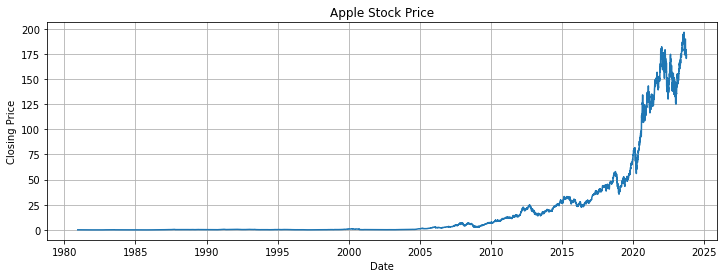

In [45]:
#Closing Price Graph
plt.figure(figsize=(12,4))
plt.plot(data['Date'], data['Close'])
plt.title("Apple Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid()
plt.show()

In [46]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

In [47]:
#same plot using plotly

trace = go.Scatter(x=data['Date'], y=data['Close'], mode='lines', name='Closing Price')
layout = go.Layout(
    title="Apple Stock Price",
    xaxis=dict(title="Date"),
    yaxis=dict(title="Closing Price"),
    showlegend=True
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [60]:
#create box plot
px.box(data, y = 'Close')

In [49]:
# Building Model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [50]:
#split data into train and test

x= np.array(data.index).reshape(-1,1)
y= data['Close']
x

array([[    0],
       [    1],
       [    2],
       ...,
       [10788],
       [10789],
       [10790]], dtype=int64)

In [51]:
trainx,testx,trainy,testy = train_test_split(x,y, test_size=0.2, random_state = 1)

In [52]:
#feature Scaling

scaler=StandardScaler()
scaler.fit(trainx)
scaler_data=scaler.transform(trainx)
scaler_data

array([[-0.90947914],
       [ 0.93251476],
       [ 0.45482991],
       ...,
       [-1.44466606],
       [-0.06750739],
       [-1.6598973 ]])

In [53]:
#create a Linear Regression model

le=LinearRegression()
le.fit(trainx,trainy)

LinearRegression()

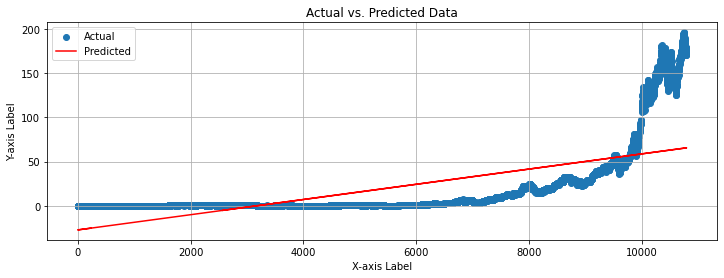

In [54]:
# Assuming you have your data in trainx and trainy
actual_x = trainx.T[0]
actual_y = trainy

# Assuming le.predict(trainx) returns the predicted values
predicted_x = trainx.T[0]
predicted_y = le.predict(trainx).T

# Create two scatter plots
plt.figure(figsize=(12,4))
plt.scatter(actual_x, actual_y, label='Actual', marker='o')
plt.plot(predicted_x, predicted_y, label='Predicted', linestyle='-', color='red')

# Customize the plot
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Actual vs. Predicted Data')
plt.legend()

# Show the plot
plt.grid()
plt.show()

In [55]:
#same plot using plotly

trace0= go.Scatter(
         x= trainx.T[0],
         y = trainy,
         mode = 'markers',
         name= 'Actual'
)

trace1= go.Scatter(
         x= trainx.T[0],
         y = le.predict(trainx).T,
         mode = 'lines',
         name= 'Predicted'
)

df = [trace0,trace1]
layout.xaxis.title.text='Day'
plot_1 = go.Figure(data = df, layout=layout)

In [56]:
plot_1

In [94]:
#calculate score for the model evaluation
scores = f'''
{'metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(trainy, le.predict(trainx))}\t{r2_score(testy, le.predict(testx))}
{'MSE'.ljust(10)}{mse(trainy, le.predict(trainx))}\t{mse(testy, le.predict(testx))}
'''
print(scores)


metric           Train                Test        
r2_score  0.4421781933949831	0.4367050935625084
MSE       906.1062051335182	888.0322844761749

